In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

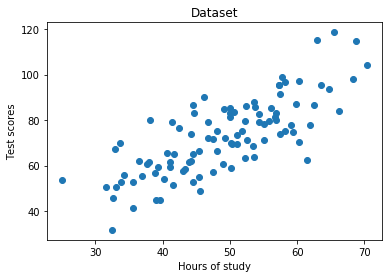

In [2]:
points = np.genfromtxt("data.csv", delimiter=",")

#Extract columns
x = np.array(points[:,0])
y = np.array(points[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

In [3]:
#set hyperparameters
learning_rate = 0.0001
initial_theta_0 = 0
initial_theta_1 = 0
num_iterations = 20

In [4]:
def cost_computations(theta_0, theta_1, points):
    m = len(points)
    total_cost = 0
    
    for record in range(m):
        x = points[record, 0]
        y = points[record, 1]
        total_cost += ((theta_0 + (theta_1*x)) - y) ** 2
    return total_cost/(2*m)

In [5]:
cost_computations(initial_theta_0, initial_theta_1, points)

2782.5539172416056

In [6]:
def gradient_descent(initial_theta_0, initial_theta_1, points, learning_rate, num_iterations):
    cost_graph = []
    theta_0_list = []
    theta_1_list = []
    
    theta_0 = initial_theta_0
    theta_1 = initial_theta_1
    for i in range(num_iterations):
        cost_graph.append(cost_computations(theta_0, theta_1, points))
        theta_0, theta_1 = step_gradient(theta_0, theta_1, np.array(points), learning_rate)
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
    return [theta_0, theta_1, cost_graph, theta_0_list, theta_1_list]
        
        
def step_gradient(current_theta_0, current_theta_1, points, learning_rate):
    gradient_theta_0 = 0
    gradient_theta_1 = 0
    m = len(points)
    for rec in range(m):
        x = points[rec, 0]
        y = points[rec, 1]
        gradient_theta_0 +=  (1/m) * ((current_theta_0 + (current_theta_1*x)) - y)
        gradient_theta_1 +=  (1/m) * (((current_theta_0 + (current_theta_1*x)) - y) * x)
        
    updated_theta_0 = current_theta_0 - (learning_rate * gradient_theta_0)
    updated_theta_1 = current_theta_1 - (learning_rate * gradient_theta_1)
    
    return updated_theta_0, updated_theta_1

In [7]:
theta_0, theta_1, cost_graph, theta_0_list, theta_1_list = gradient_descent(initial_theta_0, initial_theta_1, points, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized theta_0:', theta_0)
print ('Optimized theta_1:', theta_1)

#Print error with optimized parameters
print ('Minimized cost:', cost_computations(theta_0, theta_1, points))

Optimized theta_0: 0.029574477988405432
Optimized theta_1: 1.4741169554203892
Minimized cost: 56.35377538539148


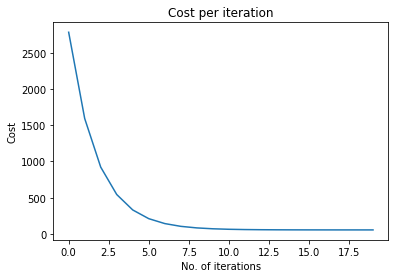

In [8]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

In [9]:
len(theta_0_list)

20

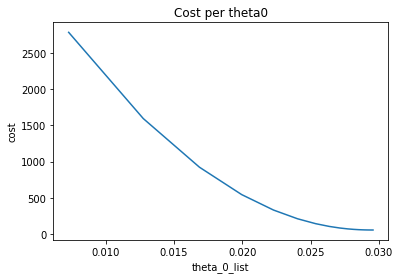

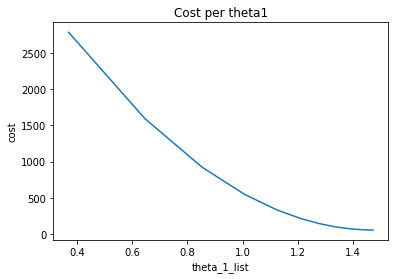

In [10]:
plt.plot(theta_0_list, cost_graph)
plt.xlabel('theta_0_list')
plt.ylabel('cost')
plt.title('Cost per theta0')
plt.show()

plt.plot(theta_1_list, cost_graph)
plt.xlabel('theta_1_list')
plt.ylabel('cost')
plt.title('Cost per theta1')
plt.show()

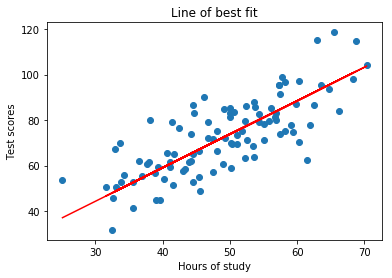

In [11]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = theta_1 * x + theta_0
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

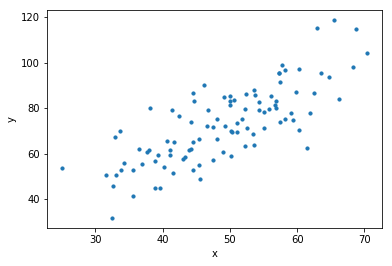

In [13]:
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
type(x),type(y)

(numpy.ndarray, numpy.ndarray)

In [15]:
regression_model = LinearRegression()
regression_model.fit(x.reshape(-1, 1), y)

y_predicted = regression_model.predict(x.reshape(-1, 1))

In [16]:
rmse=mean_squared_error(y,y_predicted)
r2 = r2_score(y, y_predicted)

In [17]:
# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [1.32243102]
Intercept: 7.991020982270399
Root mean squared error:  110.25738346621316
R2 score:  0.598655791538662


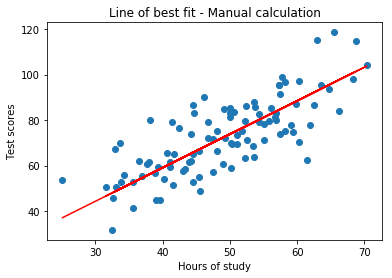

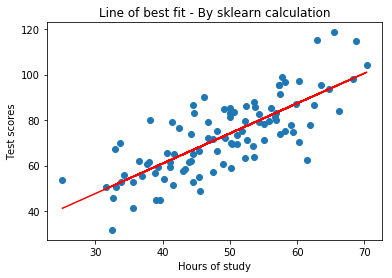

In [18]:
# plotting values

#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = theta_1 * x + theta_0
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit - Manual calculation')
plt.show()


# data points
plt.scatter(x, y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit - By sklearn calculation')
# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

In [208]:
rmse=mean_squared_error(y,pred)
r2 = r2_score(y, pred)

print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Root mean squared error:  112.70755077078299
R2 score:  0.5897370196021616
